# Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras import backend as K

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local

import McNeuron
import morphology_generator as models
import train_one_by_one_morphology as train
import batch_utils
import data_transforms

Using Theano backend.


# Load Data

In [2]:
training_data = pickle.load(open("/Volumes/Arch/Dropbox/HG-GAN/03-Data/synthetic_Two_segment_model_Different_directions_Parent_distance_n20_parent_id.p", "rb"))
#training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/train4.p", "rb"))

# Global parameters¶

In [3]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 5
batch_size = 32
n_batch_per_epoch = np.floor(training_data['morphology']['n20'].shape[0]/batch_size).astype(int)
d_iters = 20
lr_discriminator =  0.005
lr_generator = 0.0005
train_loss = 'wasserstein_loss'

rule = 'm'
train_one_by_one = False
weight_constraint = [-0.05, 0.05]

# Run

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 19, 20)        0                                            
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 19, 50)        14200       input_1[0][0]                    
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 1, 950)        0           lstm_1[0][0]                     
____________________________________________________________________________________________________
embedding (Dense)                (None, 1, 100)        95100       reshape_1[0][0]                  
___________________________________________________________________________________________

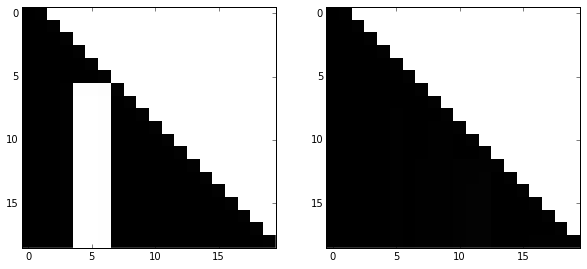

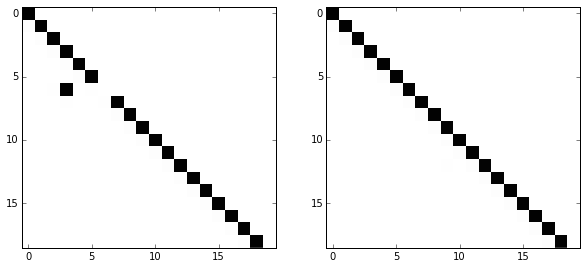

    After 20 iterations
        Discriminator Loss                     = -3052.70166016

    Generator_Loss: -4214.93652344
51
    After 20 iterations
        Discriminator Loss                     = -3967.09887695

    Generator_Loss: 1865.81140137
52
    After 20 iterations
        Discriminator Loss                     = -3815.94287109

    Generator_Loss: -4811.34716797
53
    After 20 iterations
        Discriminator Loss                     = -4801.12255859

    Generator_Loss: -4664.37646484
54
    After 20 iterations
        Discriminator Loss                     = -4928.55859375

    Generator_Loss: -5265.59033203
55
    After 20 iterations
        Discriminator Loss                     = -3656.37255859

    Generator_Loss: 9536.13183594
56
    After 20 iterations
        Discriminator Loss                     = -4948.10253906

    Generator_Loss: 7015.95068359
57
    After 20 iterations
        Discriminator Loss                     = -5320.56591797

    Generator_Loss: 6060.

In [ ]:
geom_model, cond_geom_model, morph_model, cond_morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr_discriminator=lr_discriminator,
                      lr_generator=lr_generator,
                      weight_constraint=weight_constraint,
                      rule=rule,
                      train_one_by_one=train_one_by_one,
                      train_loss=train_loss,
                      verbose=True)

In [ ]:
n_nodes = 3
input_layer = K.random_uniform((n_nodes - 1, n_nodes))
mask_lower = K.theano.tensor.tril(K.ones((n_nodes - 1, n_nodes)))
mask_upper = \
    K.theano.tensor.triu(-100. * K.ones((n_nodes - 1, n_nodes)), 1)
mask_layer = mask_lower * input_layer + mask_upper
mask_layer = mask_layer + K.eye(3)[0:n_nodes - 1,0:n_nodes]
#K.theano.tensor.tril(-100. * K.ones((3 - 1, 3)), 1).eval()
mask_layer.eval()

In [ ]:
K.eye(3)[0:2,0:3].eval()